In [1]:
!sh ./runexp.sh

use existing data to run multi class classification
[0]	train-merror:0.011719	test-merror:0.127273
[1]	train-merror:0.015625	test-merror:0.127273
[2]	train-merror:0.011719	test-merror:0.109091
[3]	train-merror:0.007812	test-merror:0.081818
[4]	train-merror:0.007812	test-merror:0.090909
Test error using softmax = 0.0909090909091
[0]	train-merror:0.011719	test-merror:0.127273
[1]	train-merror:0.015625	test-merror:0.127273
[2]	train-merror:0.011719	test-merror:0.109091
[3]	train-merror:0.007812	test-merror:0.081818
[4]	train-merror:0.007812	test-merror:0.090909
Test error using softprob = 0.0909090909091


In [ ]:
! ls
! more dermatology.data

dermatology.data		 README.md  train.py
multiclass_classification.ipynb  runexp.sh
2,2,0,3,0,0,0,0,1,0,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,55,2
3,3,3,2,1,0,0,0,1,1,1,0,0,1,0,1,2,0,2,2,2,2,2,1,0,0,0,0,0,0,0,1,0,8,1
2,1,2,3,1,3,0,3,0,0,0,1,0,0,0,1,2,0,2,0,0,0,0,0,2,0,2,3,2,0,0,2,3,26,3
2,2,2,0,0,0,0,0,3,2,0,0,0,3,0,0,2,0,3,2,2,2,2,0,0,3,0,0,0,0,0,3,0,40,1
2,3,2,2,2,2,0,2,0,0,0,1,0,0,0,1,2,0,0,0,0,0,0,0,2,2,3,2,3,0,0,2,3,45,3
2,3,2,0,0,0,0,0,0,0,0,0,2,1,0,2,2,0,2,0,0,0,1,0,0,0,0,2,0,0,0,1,0,41,2
2,1,0,2,0,0,0,0,0,0,0,0,0,0,3,1,3,0,0,0,2,0,0,0,0,0,0,0,0,0,0,2,0,18,5
2,2,3,3,3,3,0,2,0,0,0,2,0,0,0,2,3,0,0,0,0,0,0,0,0,2,2,3,2,0,0,3,3,57,3
2,2,1,0,2,0,0,0,0,0,0,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,0,2,0,0,0,2,0,22,4
2,2,1,0,1,0,0,0,0,0,0,0,0,0,0,3,2,0,2,0,0,0,0,0,0,0,0,2,0,0,0,2,0,30,4
3,3,2,1,1,0,0,0,2,2,1,0,0,0,0,0,3,2,3,2,2,2,1,1,0,0,0,0,0,0,0,1,0,20,1
2,2,0,3,0,0,0,0,0,0,0,0,0,2,0,2,2,0,0,0,0,0,1,0,0,0,0,3,0,0,0,1,0,21,2
3,3,1,2,0,0,0,0,0,1,0,0,0,2,0,3,1,0,1,0,0,0,0,0,0,0,0,2,0,0,0,1,0,2

In [2]:
from __future__ import division
import numpy as np
import xgboost as xgb

In [31]:
data = np.loadtxt('./dermatology.data', delimiter=',', converters={33: lambda x: 0 if x == b'?' else x, 34: lambda x:int(x) - 1})
# data = np.loadtxt('./dermatology.data', delimiter=',', converters={33: lambda x: int(x == '?ba'), 34: lambda x:int(x) - 1})
data

array([[  2.,   2.,   0., ...,   0.,  55.,   1.],
       [  3.,   3.,   3., ...,   0.,   8.,   0.],
       [  2.,   1.,   2., ...,   3.,  26.,   2.],
       ..., 
       [  3.,   2.,   2., ...,   3.,  28.,   2.],
       [  2.,   1.,   3., ...,   3.,  50.,   2.],
       [  3.,   2.,   2., ...,   0.,  35.,   0.]])

In [32]:
sz = data.shape
sz

(366, 35)

In [33]:
train = data[0:int(sz[0] * 0.7), :]
test = data[int(sz[0] * 0.7):, :]

print(train.shape, test.shape)

train_X, train_Y = train[:, :33], train[:, 34]
test_X, test_Y = test[:, :33], test[:, 34]

xg_train = xgb.DMatrix(train_X, label=train_Y)
xg_test = xgb.DMatrix(test_X, label=test_Y)

xg_train

(256, 35) (110, 35)


In [48]:
# 设置模型参数
param = {}
# use softmax multi-class classification
param['objective'] = 'multi:softmax'
# scale weight of positive examples
param['eta'] = 0.1
param['max_depth'] = 6
param['silent'] = 1
param['nthread'] = 4
param['num_class'] = 6

watchlist = [(xg_train, 'train'), (xg_test, 'test')]
num_round = 5
bst = xgb.train(param, xg_train, num_round, watchlist)
# get prediction
pred = bst.predict(xg_test)
error_rate = np.sum(pred != test_Y) / test_Y.shape[0]
print('Test error using softmax = {}'.format(error_rate))

[0]	train-merror:0.011719	test-merror:0.127273
[1]	train-merror:0.015625	test-merror:0.127273
[2]	train-merror:0.011719	test-merror:0.109091
[3]	train-merror:0.007812	test-merror:0.081818
[4]	train-merror:0.007812	test-merror:0.090909
Test error using softmax = 0.09090909090909091


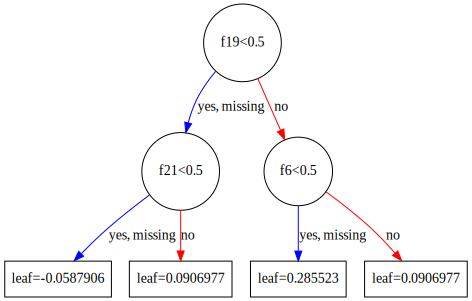

In [49]:
xgb.to_graphviz(bst, fmap='', num_trees=0, rankdir='UT', yes_color='#0000FF', no_color='#FF0000')


In [39]:
# do the same thing again, but output probabilities
param['objective'] = 'multi:softprob'
bst = xgb.train(param, xg_train, num_round, watchlist)
# Note: this convention has been changed since xgboost-unity
# get prediction, this is in 1D array, need reshape to (ndata, nclass)
pred_prob = bst.predict(xg_test).reshape(test_Y.shape[0], 6)
pred_label = np.argmax(pred_prob, axis=1)
error_rate = np.sum(pred != test_Y) / test_Y.shape[0]
print('Test error using softprob = {}'.format(error_rate))

[0]	train-merror:0.011719	test-merror:0.127273
[1]	train-merror:0.015625	test-merror:0.127273
[2]	train-merror:0.011719	test-merror:0.109091
[3]	train-merror:0.007812	test-merror:0.081818
[4]	train-merror:0.007812	test-merror:0.090909
Test error using softprob = 0.09090909090909091
